###### Saving and Loading Models

In [1]:
#import Libraries
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets,transforms
import helper
import fc_model
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Define transform to normalize data
transform=transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.5,),(0.5,))])
#Download training data
trainset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
#Load training data
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
#Download test data
testset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=False,transform=transform)
#Load test data
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

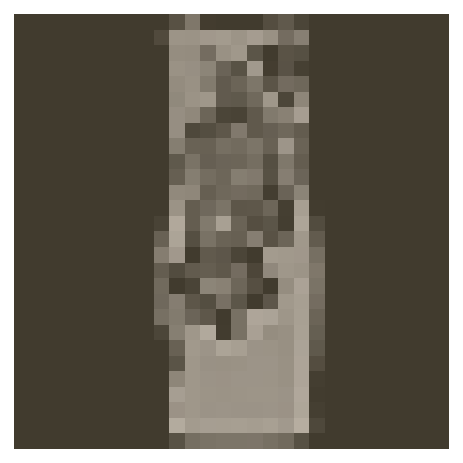

In [3]:
image,label=next(iter(trainloader))
helper.imshow(image[0,:]);

###### Train a network

In [4]:
#Create Network
model=fc_model.Network(784,10,[512,256,128])
#Define criterion
criterion=nn.NLLLoss()
#Define Optimizer
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [5]:
fc_model.train(model,trainloader,testloader,criterion,optimizer,epochs=2)

Epoch: 1/2..  Training Loss: 1.728..  Test Loss: 1.015..  Test Accuracy: 0.616
Epoch: 1/2..  Training Loss: 1.028..  Test Loss: 0.761..  Test Accuracy: 0.726
Epoch: 1/2..  Training Loss: 0.853..  Test Loss: 0.700..  Test Accuracy: 0.723
Epoch: 1/2..  Training Loss: 0.804..  Test Loss: 0.655..  Test Accuracy: 0.748
Epoch: 1/2..  Training Loss: 0.746..  Test Loss: 0.638..  Test Accuracy: 0.764
Epoch: 1/2..  Training Loss: 0.722..  Test Loss: 0.599..  Test Accuracy: 0.770
Epoch: 1/2..  Training Loss: 0.732..  Test Loss: 0.579..  Test Accuracy: 0.787
Epoch: 1/2..  Training Loss: 0.666..  Test Loss: 0.579..  Test Accuracy: 0.788
Epoch: 1/2..  Training Loss: 0.643..  Test Loss: 0.572..  Test Accuracy: 0.782
Epoch: 1/2..  Training Loss: 0.634..  Test Loss: 0.540..  Test Accuracy: 0.798
Epoch: 1/2..  Training Loss: 0.627..  Test Loss: 0.561..  Test Accuracy: 0.782
Epoch: 1/2..  Training Loss: 0.630..  Test Loss: 0.530..  Test Accuracy: 0.799
Epoch: 1/2..  Training Loss: 0.617..  Test Loss: 0.5

###### Saving and loading networks

In [6]:
print('Our model: \n\n',model,'\n')
#The parameters for PyTorch networks stored in model's state_dict
print('The test dict keys: \n\n',model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The test dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [7]:
# save state dict using torch.save
torch.save(model.state_dict(),'checkpoint.pth')

In [8]:
#load state dict using torch.load
state_dict=torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [9]:
#load state dict to the network
model.load_state_dict(state_dict)

<All keys matched successfully>

In [10]:
#Create Network with diffrente size
model = fc_model.Network(784, 10, [400, 200, 100])
#Error because tensor sizes are wrong
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for Network:
	size mismatch for hidden_layers.0.weight: copying a param with shape torch.Size([512, 784]) from checkpoint, the shape in current model is torch.Size([400, 784]).
	size mismatch for hidden_layers.0.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([400]).
	size mismatch for hidden_layers.1.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([200, 400]).
	size mismatch for hidden_layers.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for hidden_layers.2.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([100, 200]).
	size mismatch for hidden_layers.2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([100]).
	size mismatch for output.weight: copying a param with shape torch.Size([10, 128]) from checkpoint, the shape in current model is torch.Size([10, 100]).

In [ ]:
#Define checkpoint with same tensor sizes
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [ ]:
#Create function load_checkpoint to load checkpoints
def load_checkpoint(filepath):
    checkpoint=torch.load(filepath)
    model=fc_model.Network(checkpoint['input_size'],
                            checkpoint['output_size'],
                            checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    return model

In [ ]:
#load network
model=load_checkpoint('checkpoint.pth')
print(model)